In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

### Plotting Methods

In [4]:
def create_violin_plot(data, labels):
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.violinplot(data, showmeans=True, showmedians=False)
    set_axis_style(ax, labels)
    return ax

In [5]:
def set_axis_style(ax, labels):
    ax.get_xaxis().set_tick_params(direction='out')
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(np.arange(1, len(labels) + 1))
    ax.set_xticklabels(labels)
    ax.set_xlim(0.25, len(labels) + 0.75)

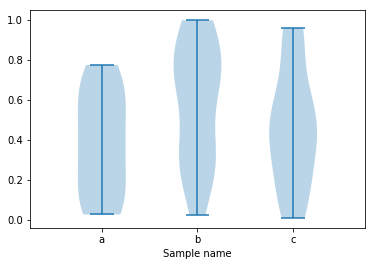

In [131]:
# testing
arrays = np.random.rand(20, 3)
ax = create_violin_plot(arrays, labels)

In [6]:
def read_travel_time_data(path):
    arr = np.genfromtxt(path, delimiter=',', dtype=np.uint16)
    arr = arr[1:] # remove first element that represents time
    return arr

In [191]:
def read_queue_data(path):
    arr = np.genfromtxt(path, delimiter=',', dtype=np.uint16)
    arr = arr[:, 1] # remove first element that represents time
    return arr

### Travel Time Metric Plot

In [309]:
folder_path = '/home/parth/repos/traffic-management/report-results/travel-time-metric'

In [310]:
files = os.listdir(folder_path)
files.sort()
files

['Queue Obs.csv',
 'Random Policy.csv',
 'Static-Max.csv',
 'Static-Mid.csv',
 'Static-Min.csv',
 'TDTSE Obs.csv']

In [311]:
arrays = []
labels = []

for file in files:
    if file.endswith('csv'):
        path = os.path.join(folder_path, file)
        arrays.append(read_travel_time_data(path))
        labels.append(file[:-4])

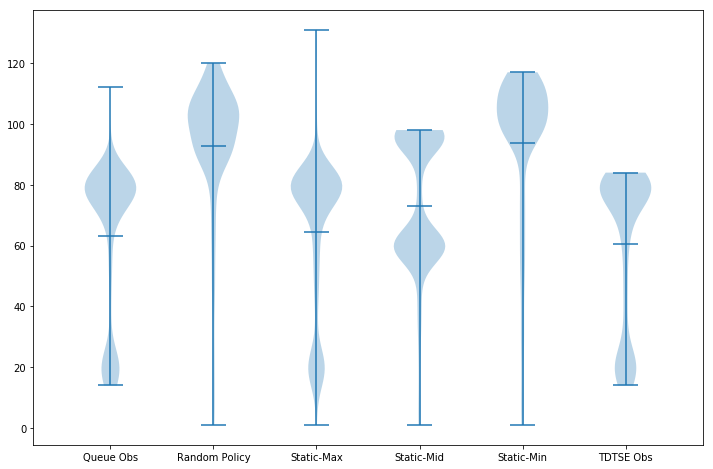

In [313]:
create_violin_plot(arrays, labels)

### Travel Time Metric Plot - Low Saturation Case

In [1]:
folder_path = '/home/parth/repos/traffic-management/report-results/low-traffic-travel-time'

In [10]:
files = os.listdir(folder_path)
files.sort()
files

['Static-Max.csv', 'Static-Mid.csv', 'Static-Min.csv']

In [11]:
arrays = []
labels = []

for file in files:
    if file.endswith('csv'):
        path = os.path.join(folder_path, file)
        arrays.append(read_travel_time_data(path))
        labels.append(file[:-4])

In [15]:
%matplotlib inline

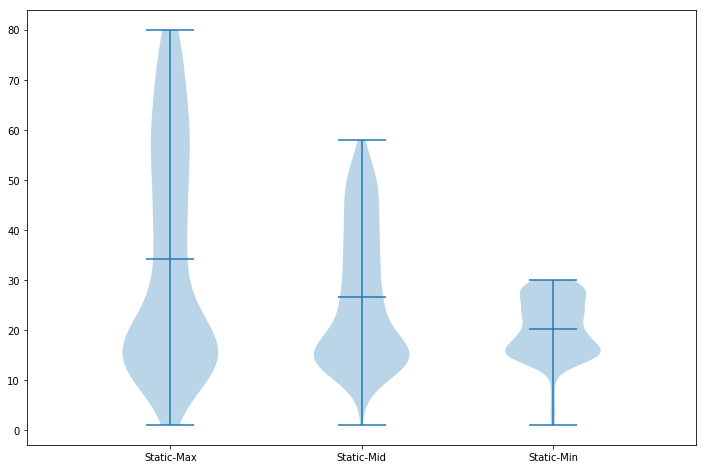

In [16]:
create_violin_plot(arrays, labels)

### Queue Metric Plot

In [314]:
folder_path = '/home/parth/repos/traffic-management/report-results/queue-metric'

In [315]:
files = os.listdir(folder_path)
files.sort()
files

['Queue Obs.csv',
 'Random Policy.csv',
 'Static-Max.csv',
 'Static-Mid.csv',
 'Static-Min.csv',
 'TDTSE Obs.csv']

In [316]:
arrays = []
labels = []

for file in files:
    if file.endswith('csv'):
        path = os.path.join(folder_path, file)
        arrays.append(read_queue_data(path))
        labels.append(file[:-4])

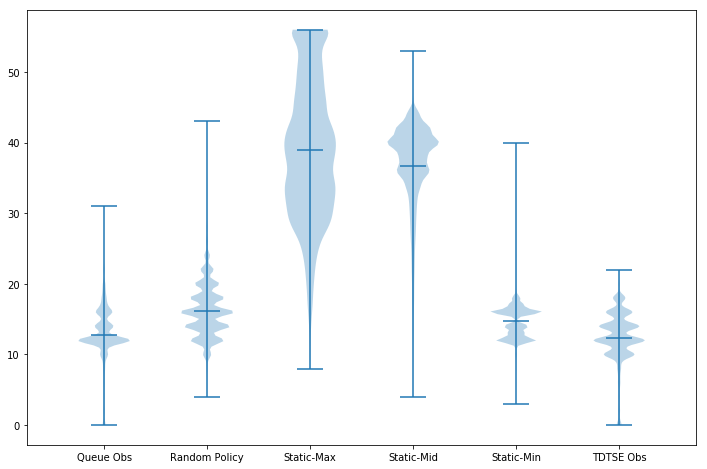

In [317]:
create_violin_plot(arrays, labels)

In [308]:
# arrays = np.array(arrays)
# df = pd.DataFrame(data=(arrays.T))
# df.describe()

### Training Plot

In [355]:
folder_path = '/home/parth/repos/traffic-management/report-results/tensorboard-training-data'

In [356]:
files = os.listdir(folder_path)
files

['run-queue-experiment_state-2020-04-12_12-23-55-tag-ray_tune_episode_reward_mean.csv',
 'run-tdtse-experiment_state-2020-04-12_11-23-56-tag-ray_tune_episode_reward_mean.csv']

In [357]:
def get_data(path):
    array = np.genfromtxt(path, delimiter=',')
    steps = array[1:, 1]
    values = array[1:, 2]
    return steps, values

Text(0, 0.5, 'Queue Length (# of vehicles)')

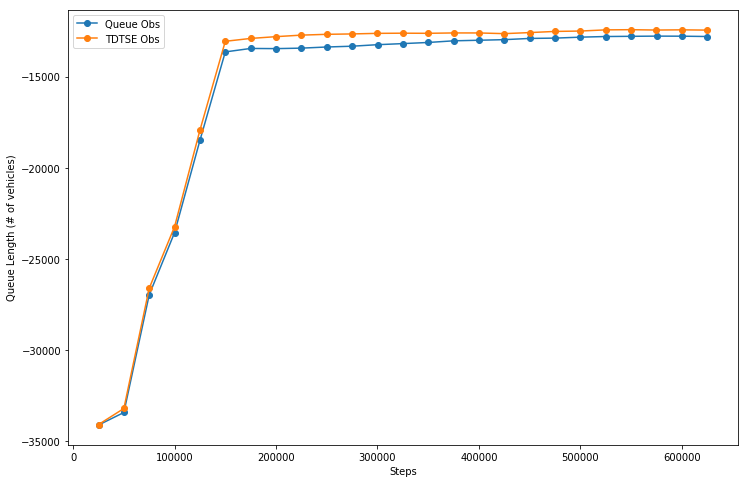

In [362]:
arrays = []
labels = ['Queue Obs', 'TDTSE Obs']
fig, ax = plt.subplots(figsize=(12, 8))

for idx, file in enumerate(files):
    if file.endswith('csv'):
        path = os.path.join(folder_path, file)
        steps, values = get_data(path)
        ax.plot(steps, values, 'o-', label=labels[idx])

ax.legend()
ax.set_xlabel('Steps')
ax.set_ylabel('Queue Length (# of vehicles)')